In [41]:

# Download some digit images from MNIST dataset
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "../images/mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "../images/mnist_1.jpg"

In [42]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [43]:
print('torch version : {}'.format(torch.__version__))

torch version : 2.8.0


In [44]:
torch.set_default_device('mps')

In [45]:
torch.backends.mps.is_available()

True

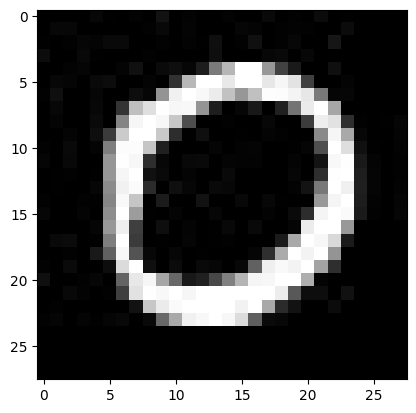

In [46]:
digit_0_array_og = cv2.imread('../images/mnist_0.jpg')
digit_1_array_og = cv2.imread('../images/mnist_1.jpg')

plt.imshow(digit_0_array_og)

In [47]:
digit_0_array_gray = cv2.imread('../images/mnist_0.jpg', cv2.IMREAD_GRAYSCALE)
digit_1_array_gray = cv2.imread('../images/mnist_1.jpg', cv2.IMREAD_GRAYSCALE)

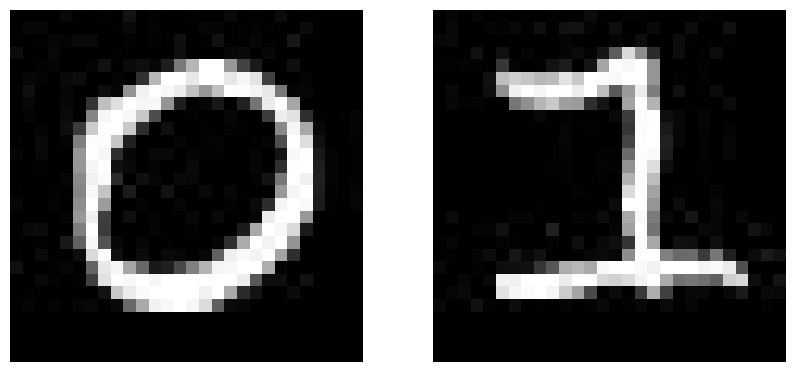

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].imshow(digit_0_array_og, cmap='gray', interpolation='none')
axs[0].axis('off')

axs[1].imshow(digit_1_array_og, cmap='gray', interpolation='none')
axs[1].axis('off')

plt.show()

Shape of Normalised Digit 0 Tensor:  torch.Size([28, 28, 3])
Normalised Min pixel value: 0.0 ; Normalised Max pixel value : 1.0


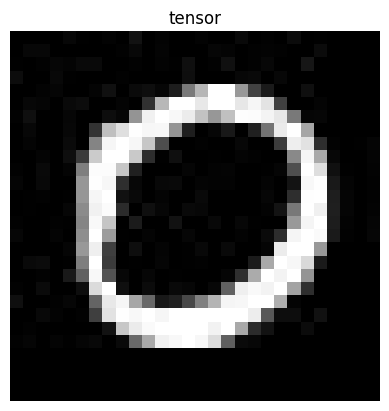

In [49]:
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

print('Shape of Normalised Digit 0 Tensor: ', img_tensor_0.shape)
print(f'Normalised Min pixel value: {torch.min(img_tensor_0)} ; Normalised Max pixel value : {torch.max(img_tensor_0)}')

plt.imshow(img_tensor_0.cpu(), cmap='gray')
plt.title('tensor')
plt.axis('off')
plt.show()

In [50]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])

print('Batch Tensor Shape: ', batch_tensor.shape)

Batch Tensor Shape:  torch.Size([2, 28, 28, 3])


In [51]:
batch_input = batch_tensor.permute(0,3,1,2)
print('Batch Tensor Shape: ', batch_input.shape)

Batch Tensor Shape:  torch.Size([2, 3, 28, 28])


In [52]:
batch_input = batch_input.permute(3,2,1,0)
print('Batch Tensor Shape: ', batch_input.shape)

Batch Tensor Shape:  torch.Size([28, 28, 3, 2])


In [56]:
a = np.array([1,2,3])
b = torch.from_numpy(a)

b

tensor([1, 2, 3])